## 8 Métodos de machine learning para predecir la obesidad a través de diferentes tipos de colesterol y presión de la sangre.

### Variables que usaremos

#### LDL = colesterol (“malo”)
#### TG = triglicéridos (tipo de grasa)
#### HDL = colesterol (“bueno)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
nombre_archivo = "Dataset_limpio1.xlsx"

In [3]:
path_to_zips = "/home/dsc/Desktop/TFM/DATA/"

In [4]:
dataset = path_to_zips + nombre_archivo

In [5]:
df = pd.read_excel(path_to_zips + nombre_archivo)

In [6]:
df.head()

Height  Weight    BMI      WC     HIP   WHR    SBP   DBP   LDL    TG   CHO  \
0  141.00   73.10  36.77   91.05   98.15  0.93  103.0  66.0  2.05  1.23  3.87   
1  178.00  114.50  36.14  115.60  120.05  0.96  129.0  88.0  1.92  0.94  3.57   
2  165.60   94.00  34.28  101.45  118.90  0.85   99.0  64.0  2.43  1.90  4.69   
3  178.00  105.35  33.25  103.75  113.15  0.92  110.0  71.0  2.46  1.86  4.74   
4  154.55   77.85  32.59   91.40  105.45  0.87  104.0  64.0  2.41  1.52  4.14   

    HDL  Fruit  Vegetable  beverage  Meat  breakfast  
0  1.21    1.0        0.0         0   7.0          7  
1  0.99    0.0        7.0         0   7.0          7  
2  1.13   12.0       14.0         0  35.0          6  
3  1.30   21.0       21.0         0   7.0          7  
4  1.09   14.0        7.0         0   1.0          7

In [7]:
df.loc[:,"Sobrepeso"] = 0
df.head()

Height  Weight    BMI      WC     HIP   WHR    SBP   DBP   LDL    TG   CHO  \
0  141.00   73.10  36.77   91.05   98.15  0.93  103.0  66.0  2.05  1.23  3.87   
1  178.00  114.50  36.14  115.60  120.05  0.96  129.0  88.0  1.92  0.94  3.57   
2  165.60   94.00  34.28  101.45  118.90  0.85   99.0  64.0  2.43  1.90  4.69   
3  178.00  105.35  33.25  103.75  113.15  0.92  110.0  71.0  2.46  1.86  4.74   
4  154.55   77.85  32.59   91.40  105.45  0.87  104.0  64.0  2.41  1.52  4.14   

    HDL  Fruit  Vegetable  beverage  Meat  breakfast  Sobrepeso  
0  1.21    1.0        0.0         0   7.0          7          0  
1  0.99    0.0        7.0         0   7.0          7          0  
2  1.13   12.0       14.0         0  35.0          6          0  
3  1.30   21.0       21.0         0   7.0          7          0  
4  1.09   14.0        7.0         0   1.0          7          0

In [8]:
df["Sobrepeso"] = [1 if x>=25 else 0 for x in df["BMI"]]

In [9]:
df.sample(8)

Height  Weight    BMI     WC     HIP   WHR    SBP   DBP   LDL    TG  \
1761  156.45   36.50  14.91  64.00   77.00  0.83   97.0  58.0  2.28  1.48   
612   136.55   36.45  19.55  67.15   73.05  0.92   98.0  63.0  2.72  0.95   
24    156.90   70.40  28.60  94.95  100.25  0.95  108.0  58.0  3.29  2.24   
1755  151.05   34.05  14.92  59.50   74.50  0.80  109.0  65.0  3.00  0.57   
891   134.45   33.00  18.26  65.00   70.00  0.93  106.5  66.5  2.87  0.81   
1064  165.05   47.90  17.58  67.00   84.00  0.80  100.0  59.0  2.05  0.55   
1802  135.55   27.00  14.69  56.00   58.00  0.97   87.0  55.0  2.49  1.06   
628   162.00   51.15  19.49  66.05   81.75  0.81   85.0  49.0  2.10  0.75   

       CHO   HDL  Fruit  Vegetable  beverage  Meat  breakfast  Sobrepeso  
1761  4.98  1.65    5.0       14.0         0   7.0          7          0  
612   4.56  1.47   12.0       21.0      1000   7.0          7          0  
24    5.55  0.96   10.0        3.0       500   7.0          7          1  
1755  5.07  1.76    7.0        7.0      2000   2.0          7          0  
891   4.28  1.05    7.0        9.0       750   1.0          7          0  
1064  4.56  2.00    3.0       14.0         0   7.0          7          0  
1802  4.82  1.81   10.0       14.0         0   4.0          7          0  
628   4.05  1.59    4.0       21.0      2500   7.0          7          0

In [10]:
df.loc[:,"Estado"] = 0
df.head()

Height  Weight    BMI      WC     HIP   WHR    SBP   DBP   LDL    TG   CHO  \
0  141.00   73.10  36.77   91.05   98.15  0.93  103.0  66.0  2.05  1.23  3.87   
1  178.00  114.50  36.14  115.60  120.05  0.96  129.0  88.0  1.92  0.94  3.57   
2  165.60   94.00  34.28  101.45  118.90  0.85   99.0  64.0  2.43  1.90  4.69   
3  178.00  105.35  33.25  103.75  113.15  0.92  110.0  71.0  2.46  1.86  4.74   
4  154.55   77.85  32.59   91.40  105.45  0.87  104.0  64.0  2.41  1.52  4.14   

    HDL  Fruit  Vegetable  beverage  Meat  breakfast  Sobrepeso  Estado  
0  1.21    1.0        0.0         0   7.0          7          1       0  
1  0.99    0.0        7.0         0   7.0          7          1       0  
2  1.13   12.0       14.0         0  35.0          6          1       0  
3  1.30   21.0       21.0         0   7.0          7          1       0  
4  1.09   14.0        7.0         0   1.0          7          1       0

In [11]:
df.sample(5)

Height  Weight    BMI     WC    HIP   WHR    SBP   DBP   LDL    TG  \
752   130.75   32.15  18.81  66.10  73.50  0.90   87.0  48.5  2.33  1.10   
2241  131.20   20.40  11.85  48.00  58.00  0.83   95.0  66.0  2.72  0.87   
2061  120.75   19.90  13.65  51.00  61.00  0.84  101.5  64.5  2.41  0.51   
1963  121.05   20.60  14.06  49.95  57.35  0.87  101.0  59.0  1.92  0.70   
1502  125.65   24.95  15.80  58.00  67.00  0.87   99.0  67.0  3.13  0.77   

       CHO   HDL  Fruit  Vegetable  beverage  Meat  breakfast  Sobrepeso  \
752   4.30  0.99    3.0       15.0         0   7.0          7          0   
2241  5.12  1.30   10.5       10.5         0  10.5          7          0   
2061  4.77  2.18    0.0        7.0         0   3.5          7          0   
1963  3.54  0.95    6.0        7.0         0   3.5          7          0   
1502  5.05  1.40    7.0        7.0         0   7.0          7          0   

      Estado  
752        0  
2241       0  
2061       0  
1963       0  
1502       0

In [12]:
df[['BMI']] = df[['BMI']].astype(float)

In [13]:
a = "Insuficiencia_Ponderal"
b = "Normal"
c = "Sobrepeso"
d = "Obesidad_I"
e = "Obesidad_II"

In [14]:
tipos = []

In [15]:
for x in df["BMI"]:
    
    if x>=0 and x <=18.4:
        tipos.append(a)
    elif x>=18.5 and x <=24.9:
        tipos.append(b)
    elif x >= 25 and x<=29.9:
        tipos.append(c)
    elif x>=30 and x <=34.9:
        tipos.append(d)
    elif x>=34.9 and x <=39.9:
        tipos.append(e)

In [16]:
df["Estado"]=pd.Series(tipos)

In [17]:
df.head()

Height  Weight    BMI      WC     HIP   WHR    SBP   DBP   LDL    TG   CHO  \
0  141.00   73.10  36.77   91.05   98.15  0.93  103.0  66.0  2.05  1.23  3.87   
1  178.00  114.50  36.14  115.60  120.05  0.96  129.0  88.0  1.92  0.94  3.57   
2  165.60   94.00  34.28  101.45  118.90  0.85   99.0  64.0  2.43  1.90  4.69   
3  178.00  105.35  33.25  103.75  113.15  0.92  110.0  71.0  2.46  1.86  4.74   
4  154.55   77.85  32.59   91.40  105.45  0.87  104.0  64.0  2.41  1.52  4.14   

    HDL  Fruit  Vegetable  beverage  Meat  breakfast  Sobrepeso       Estado  
0  1.21    1.0        0.0         0   7.0          7          1  Obesidad_II  
1  0.99    0.0        7.0         0   7.0          7          1  Obesidad_II  
2  1.13   12.0       14.0         0  35.0          6          1   Obesidad_I  
3  1.30   21.0       21.0         0   7.0          7          1   Obesidad_I  
4  1.09   14.0        7.0         0   1.0          7          1   Obesidad_I

In [18]:
df.tail()

Height  Weight    BMI    WC   HIP   WHR   SBP   DBP   LDL    TG   CHO  \
2238  134.05    21.5  11.96  54.0  60.0  0.90  90.0  60.0  1.40  0.72  3.39   
2239  126.65    19.1  11.91  47.5  56.0  0.85  88.0  54.0  2.18  0.75  3.93   
2240  123.15    18.0  11.87  49.0  57.0  0.86  82.5  58.0  1.50  0.59  3.94   
2241  131.20    20.4  11.85  48.0  58.0  0.83  95.0  66.0  2.72  0.87  5.12   
2242  136.15    21.5  11.60  52.0  60.0  0.87  88.0  58.0  2.67  0.82  4.52   

       HDL  Fruit  Vegetable  beverage  Meat  breakfast  Sobrepeso Estado  
2238  1.53   12.0        6.0         0   0.0          6          0    NaN  
2239  1.50    4.0        0.0      1000   9.0          7          0    NaN  
2240  0.90    5.0       14.0         0   7.0          7          0    NaN  
2241  1.30   10.5       10.5         0  10.5          7          0    NaN  
2242  1.52   14.0       42.0         0  14.0          7          0    NaN

In [19]:
df.sample(10)

Height  Weight    BMI     WC     HIP   WHR    SBP   DBP   LDL    TG  \
1328  135.40   30.20  16.47  59.00   69.50  0.85  100.0  66.0  2.46  1.07   
20    148.55   64.50  29.23  91.55   91.60  1.00  108.0  70.0  3.19  1.38   
1854  126.00   22.95  14.46  51.40   58.10  0.88   97.0  61.0  3.00  0.66   
1823  125.55   23.00  14.59  53.90   58.15  0.93   92.0  64.0  1.89  0.71   
210   158.05   56.90  22.78  77.00   94.00  0.82  100.0  65.0  2.87  1.24   
605   134.45   35.40  19.58  65.35   74.95  0.87   91.0  55.0  1.99  0.62   
231   171.25   65.95  22.49  76.00  100.00  0.76   97.0  58.0  2.05  1.00   
217   180.50   73.90  22.68  78.25   95.65  0.82  121.0  79.0  1.89  0.51   
1911  123.45   21.70  14.24  53.50   61.00  0.88   80.0  52.0  2.36  0.67   
393   158.00   52.10  20.87  68.40   83.25  0.82  109.0  64.0  2.87  0.60   

       CHO   HDL  Fruit  Vegetable  beverage  Meat  breakfast  Sobrepeso  \
1328  4.54  1.59    0.0        0.0       250   0.0          0          0   
20    4.95  1.18   14.0        0.0         0  12.0          7          1   
1854  5.15  1.47   21.0       49.0         0  14.0          7          0   
1823  3.75  1.53    0.0        0.0       500   0.0          0          0   
210   5.33  1.70   14.0       14.0         0   7.0          7          0   
605   4.76  1.27    3.0        4.0       250   9.0          7          0   
231   3.98  1.18   12.0       28.0      3000   7.0          7          0   
217   3.99  1.75    7.0        7.0       750   7.0          0          0   
1911  4.37  1.60   15.0        3.0       250   0.0          7          0   
393   4.83  1.51   12.0       28.0         0   2.0          7          0   

                      Estado  
1328  Insuficiencia_Ponderal  
20                 Sobrepeso  
1854  Insuficiencia_Ponderal  
1823  Insuficiencia_Ponderal  
210                   Normal  
605                   Normal  
231                   Normal  
217                   Normal  
1911  Insuficiencia_Ponderal  
393                   Normal

In [20]:
df.isnull().sum()

Height        0
Weight        0
BMI           0
WC            0
HIP           0
WHR           0
SBP           0
DBP           0
LDL           0
TG            0
CHO           0
HDL           0
Fruit         0
Vegetable     0
beverage      0
Meat          0
breakfast     0
Sobrepeso     0
Estado       28
dtype: int64

In [21]:
##Borrar nulos

In [22]:
df = df.dropna()

In [23]:
df.isnull().sum()

Height       0
Weight       0
BMI          0
WC           0
HIP          0
WHR          0
SBP          0
DBP          0
LDL          0
TG           0
CHO          0
HDL          0
Fruit        0
Vegetable    0
beverage     0
Meat         0
breakfast    0
Sobrepeso    0
Estado       0
dtype: int64

In [24]:
df.sample(10)

Height  Weight    BMI     WC    HIP   WHR    SBP   DBP   LDL    TG  \
1607  154.10   36.60  15.41  77.00  56.25  1.37   87.0  53.0  2.38  1.77   
1095  172.45   51.90  17.45  67.25  83.70  0.80   96.0  60.0  1.55  0.84   
1342  144.00   34.05  16.42  65.85  68.05  0.97  108.0  62.0  3.32  1.00   
716   157.05   47.00  19.06  69.00  86.00  0.80  104.5  69.0  2.12  1.14   
1477  139.15   30.75  15.88  62.50  70.00  0.89   92.0  68.0  2.51  0.71   
117   166.15   68.00  24.63  81.00  99.50  0.81   94.0  60.0  2.25  0.81   
1325  163.75   44.25  16.50  63.70  78.05  0.82   92.0  59.0  1.50  1.06   
946   173.75   54.45  18.04  70.00  88.50  0.79   99.0  67.0  2.77  0.92   
1200  160.65   43.80  16.97  64.95  77.35  0.84  108.0  68.0  2.07  2.02   
1410  158.75   40.65  16.13  60.55  75.25  0.80   90.0  59.0  2.05  1.36   

       CHO   HDL  Fruit  Vegetable  beverage  Meat  breakfast  Sobrepeso  \
1607  5.07  1.63    3.0       14.0       500  14.0          7          0   
1095  3.31  1.20   14.0       14.0       500  14.0          7          0   
1342  5.16  1.29    5.0        0.0         0   7.0          7          0   
716   4.41  1.61    5.0       14.0       500   7.0          7          0   
1477  4.10  1.32    7.0       14.0       250   7.0          7          0   
117   3.95  1.03    8.0       14.0       750   7.0          7          0   
1325  3.31  1.13    5.0       21.0       500  21.0          7          0   
946   4.72  1.51    2.0        6.0         0   6.0          7          0   
1200  4.09  1.18    6.0       28.0      2250  14.0          7          0   
1410  4.46  1.56   10.5       28.0         0  21.0          7          0   

                      Estado  
1607  Insuficiencia_Ponderal  
1095  Insuficiencia_Ponderal  
1342  Insuficiencia_Ponderal  
716                   Normal  
1477  Insuficiencia_Ponderal  
117                   Normal  
1325  Insuficiencia_Ponderal  
946   Insuficiencia_Ponderal  
1200  Insuficiencia_Ponderal  
1410  Insuficiencia_Ponderal

In [25]:
def contador_estado (lista):
    Insuficiencia_Ponderal = 0
    Normal = 0
    Sobrepeso = 0
    Obesidad_I = 0
    Obesidad_II = 0
    
    for x in lista:
    
        if x== "Insuficiencia_Ponderal":
            Insuficiencia_Ponderal += +1
        elif x=="Normal":
            Normal += 1
        elif x=="Sobrepeso":
            Sobrepeso += 1
        elif x == "Obesidad_I":
            Obesidad_I += 1
        elif x == "Obesidad_II":
            Obesidad_II += 1
        
    print("Insuficiencia_Ponderal",Insuficiencia_Ponderal)
    print("Normal" , Normal)
    print("Sobrepeso", Sobrepeso)
    print("Obesidad_I", Obesidad_I)
    print("Obesidad_II", Obesidad_II)

In [26]:
lista_estado = df["Estado"].tolist()

In [27]:
contador_estado(lista_estado)

Insuficiencia_Ponderal 1391
Normal 726
Sobrepeso 83
Obesidad_I 13
Obesidad_II 2


## Train/Test Estado

In [28]:
X = df[["LDL","TG", "HDL"]].values
y = df["Estado"]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Train/Test BMI

In [31]:
df2 = df

In [32]:
df2[['BMI']] = df2[['BMI']].astype(int)

In [33]:
df2.sample(5)

Height  Weight  BMI     WC    HIP   WHR    SBP   DBP   LDL    TG   CHO  \
438   165.50   56.40   20  69.45  87.95  0.79  101.0  61.0  1.50  0.45  3.22   
435   160.05   52.80   20  71.00  90.00  0.79   98.0  67.0  2.07  0.81  3.98   
1599  125.55   24.35   15  53.15  60.45  0.88   97.0  58.0  1.68  0.49  3.61   
2021  132.05   24.15   13  53.50  63.50  0.84  100.5  77.0  2.28  1.27  4.11   
1476  131.00   27.25   15  57.45  68.05  0.84   91.5  65.0  2.64  0.58  4.75   

       HDL  Fruit  Vegetable  beverage  Meat  breakfast  Sobrepeso  \
438   1.39    5.0       69.3       500  28.0          7          0   
435   1.36    6.0        7.0       500   7.0          7          0   
1599  1.54    7.0        4.0         0   7.0          7          0   
2021  1.25   35.0       49.0      1000   0.0          5          0   
1476  1.84    4.0       12.0         0   8.0          7          0   

                      Estado  
438                   Normal  
435                   Normal  
1599  Insuficiencia_Ponderal  
2021  Insuficiencia_Ponderal  
1476  Insuficiencia_Ponderal

In [34]:
X2 = df2[["LDL","TG", "HDL"]].values
y2 = df2["BMI"]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.35, random_state=1)

## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
clf=DecisionTreeClassifier(min_samples_leaf = 10)

In [39]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
print (cross_val_score(clf, X, y, cv=10,scoring="accuracy").mean())

0.576207194546419


/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
clf1=GridSearchCV(estimator=DecisionTreeClassifier(min_samples_leaf=20),
                  param_grid={"min_samples_leaf":np.arange(5,50)})
clf1.fit(X,y)

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
clf1.best_params_

{'min_samples_leaf': 49}

In [45]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [46]:
dot_data = tree.export_graphviz(clf,out_file=None)

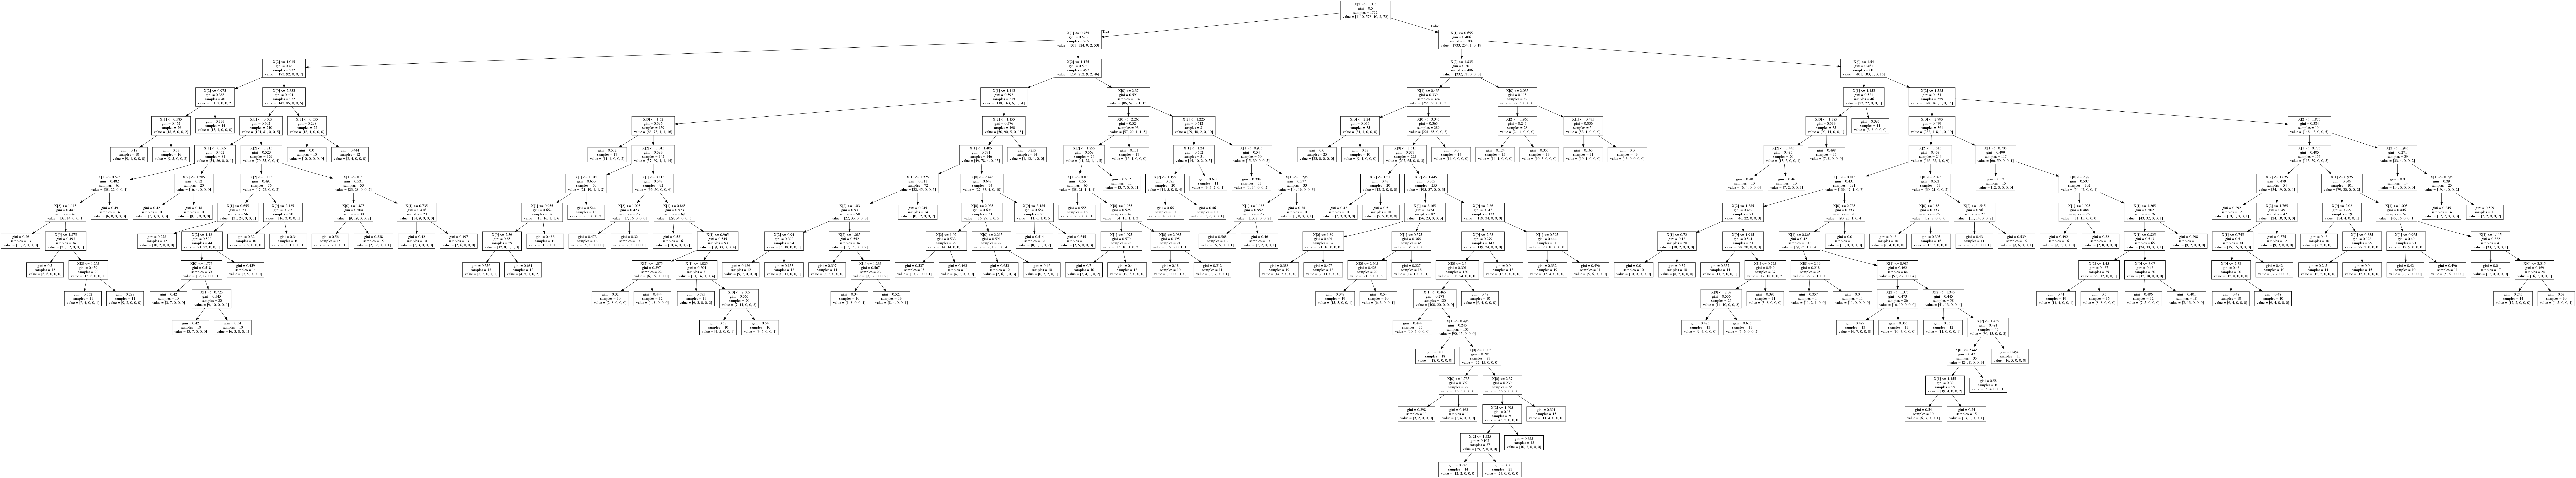

In [47]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

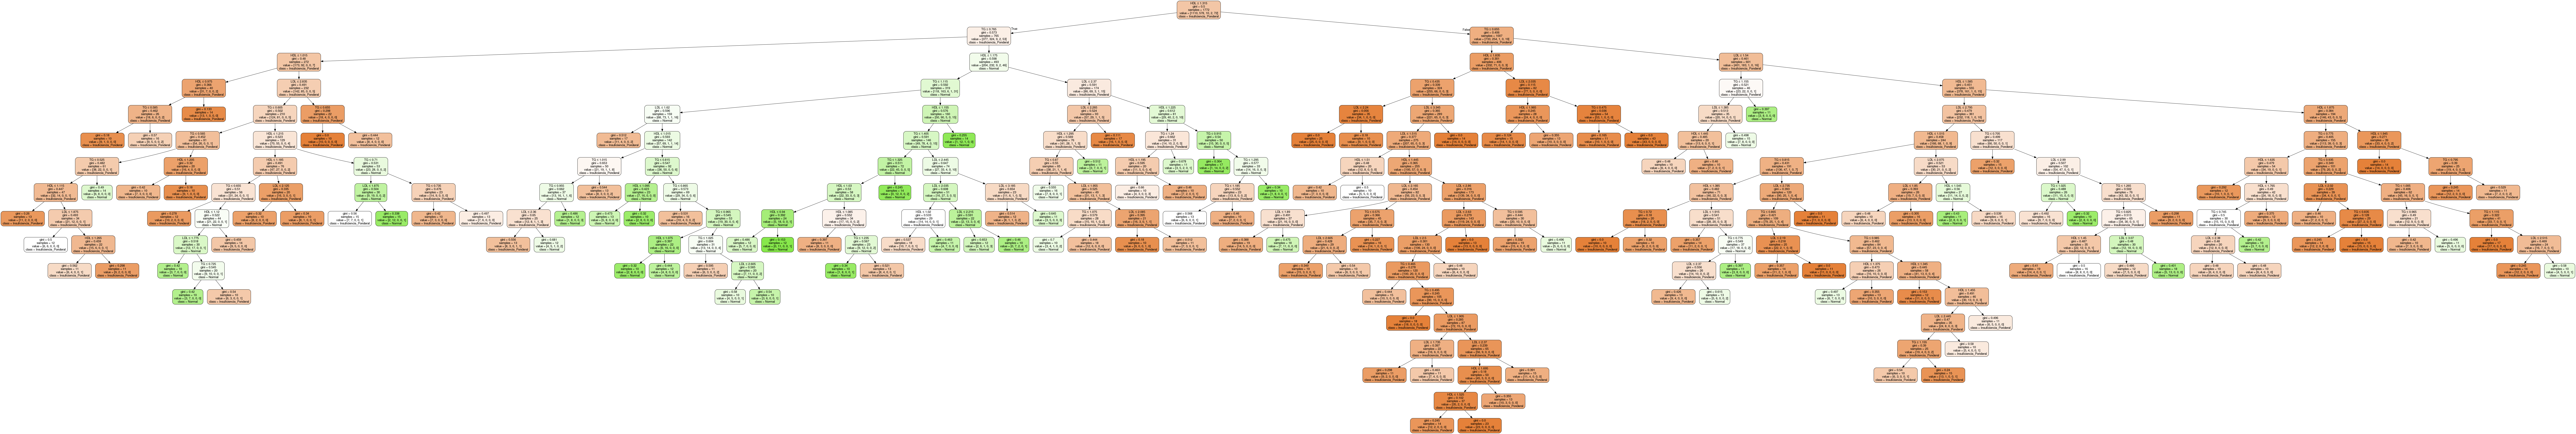

In [50]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["LDL","TG", "HDL"], 
                         class_names=[a,b,c,d,e],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [51]:
from ipywidgets import interact

In [52]:
df.describe()

Height       Weight          BMI           WC          HIP  \
count  2215.000000  2215.000000  2215.000000  2215.000000  2215.000000   
mean    147.100068    40.185282    17.437472    64.341580    75.685824   
std      16.771569    14.758341     3.552617    10.161278    11.825292   
min     114.250000    17.500000    12.000000    44.050000    52.000000   
25%     132.550000    27.600000    15.000000    56.050000    65.475000   
50%     145.600000    38.550000    17.000000    63.300000    76.000000   
75%     161.000000    50.475000    19.000000    70.000000    84.750000   
max     191.600000   114.500000    36.000000   115.600000   120.050000   

               WHR          SBP          DBP          LDL           TG  \
count  2215.000000  2215.000000  2215.000000  2215.000000  2215.000000   
mean      0.852528    97.044695    61.709932     2.333354     0.865332   
std       0.059499     9.031288     6.711868     0.625296     0.355466   
min       0.690000    72.500000    43.000000     0.390000     0.290000   
25%       0.810000    90.000000    58.000000     1.890000     0.610000   
50%       0.850000    97.000000    61.000000     2.280000     0.780000   
75%       0.890000   102.000000    66.000000     2.750000     1.035000   
max       1.370000   129.000000    90.000000     4.350000     2.430000   

               CHO          HDL        Fruit    Vegetable      beverage  \
count  2215.000000  2215.000000  2215.000000  2215.000000   2215.000000   
mean      4.248181     1.385413     7.940677    12.390293    487.821670   
std       0.711630     0.298016     7.485896    10.747378   1005.369418   
min       2.120000     0.510000     0.000000     0.000000      0.000000   
25%       3.760000     1.170000     3.000000     7.000000      0.000000   
50%       4.190000     1.360000     7.000000    10.000000    250.000000   
75%       4.710000     1.570000    10.000000    14.000000    500.000000   
max       6.530000     2.380000    69.300000    69.300000  17325.000000   

              Meat    breakfast    Sobrepeso  
count  2215.000000  2215.000000  2215.000000  
mean     10.685959     6.253725     0.044244  
std      10.326258     1.963926     0.205683  
min       0.000000     0.000000     0.000000  
25%       6.000000     7.000000     0.000000  
50%       7.000000     7.000000     0.000000  
75%      14.000000     7.000000     0.000000  
max      70.000000     7.000000     1.000000

In [53]:
@interact(LDL=2.5, TG=1.3, HDL =1.2)
def show( LDL, TG, HDL):
    return clf.predict([[ LDL, TG, HDL]])

interactive(children=(FloatSlider(value=2.5, description='LDL', max=7.5, min=-2.5), FloatSlider(value=1.3, description='TG', max=3.9000000000000004, min=-1.3), FloatSlider(value=1.2, description='HDL', max=3.5999999999999996, min=-1.2), Output()), _dom_classes=('widget-interact',))

## Random Forest Estado

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rand = RandomForestClassifier(n_estimators=100,max_depth=4)

In [56]:
rand.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

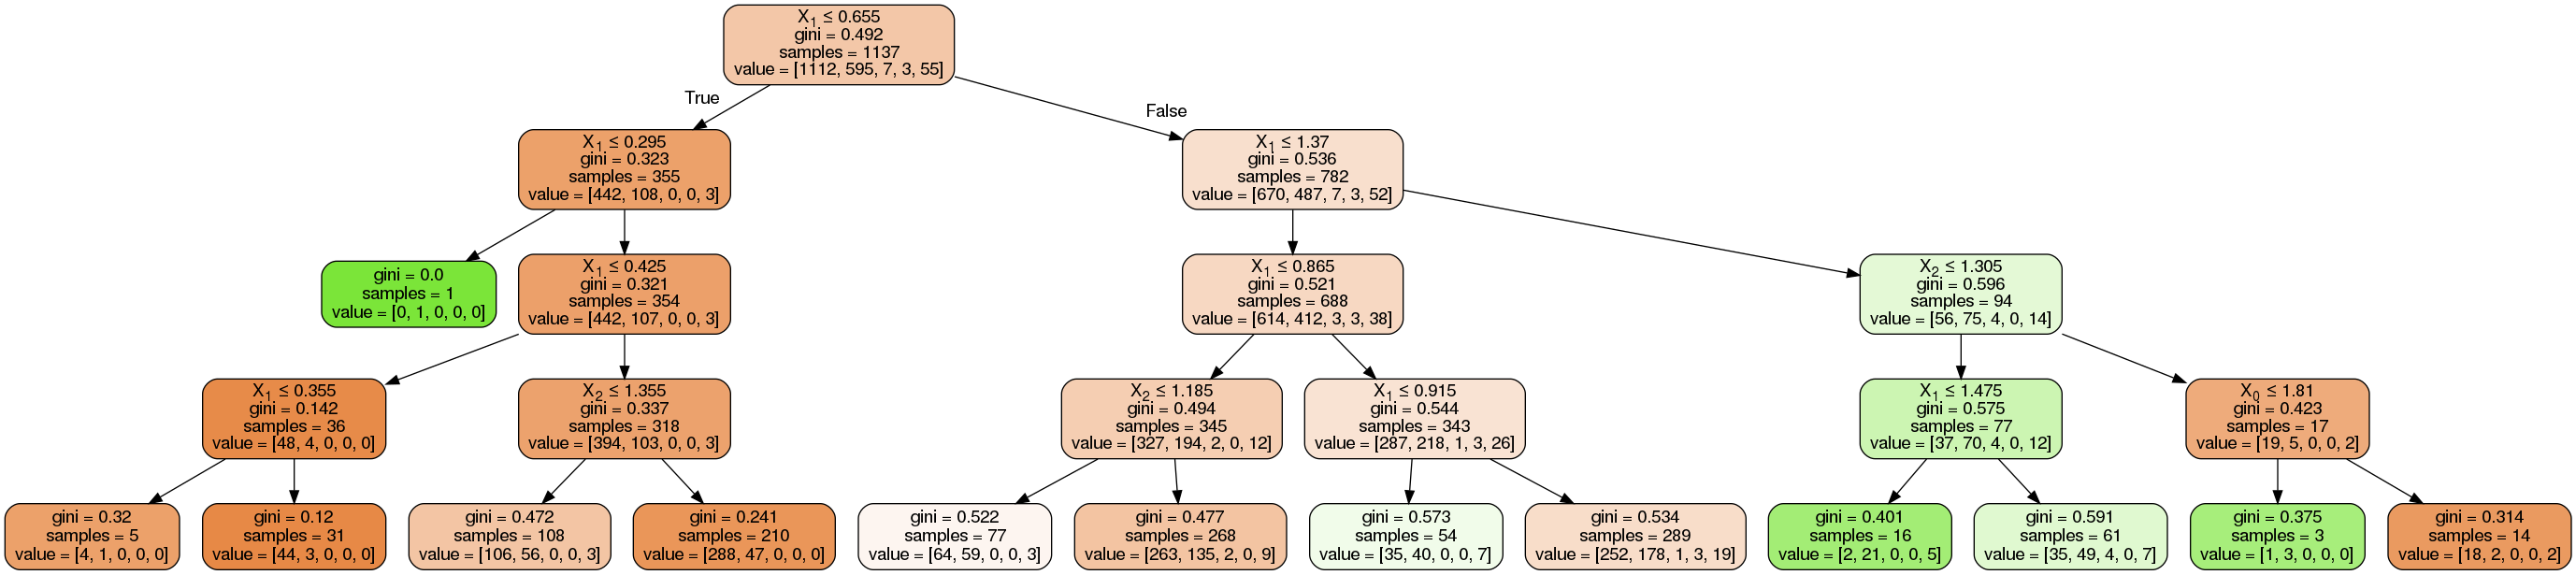

In [58]:
dot_data = tree.export_graphviz(rand.estimators_[5], out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

In [59]:
print (cross_val_score(rand, X, y, cv=10,scoring="accuracy").mean())

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.6371194178048569


In [60]:
@interact(LDL=2.5, TG=1.3, HDL =1.2)
def show(LDL, TG, HDL):
    return rand.predict([[LDL, TG, HDL]])

interactive(children=(FloatSlider(value=2.5, description='LDL', max=7.5, min=-2.5), FloatSlider(value=1.3, description='TG', max=3.9000000000000004, min=-1.3), FloatSlider(value=1.2, description='HDL', max=3.5999999999999996, min=-1.2), Output()), _dom_classes=('widget-interact',))

## Random Forest BMI

In [61]:
rand2 = RandomForestClassifier(n_estimators=100,max_depth=4)

In [62]:
rand2.fit(X2_train,y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

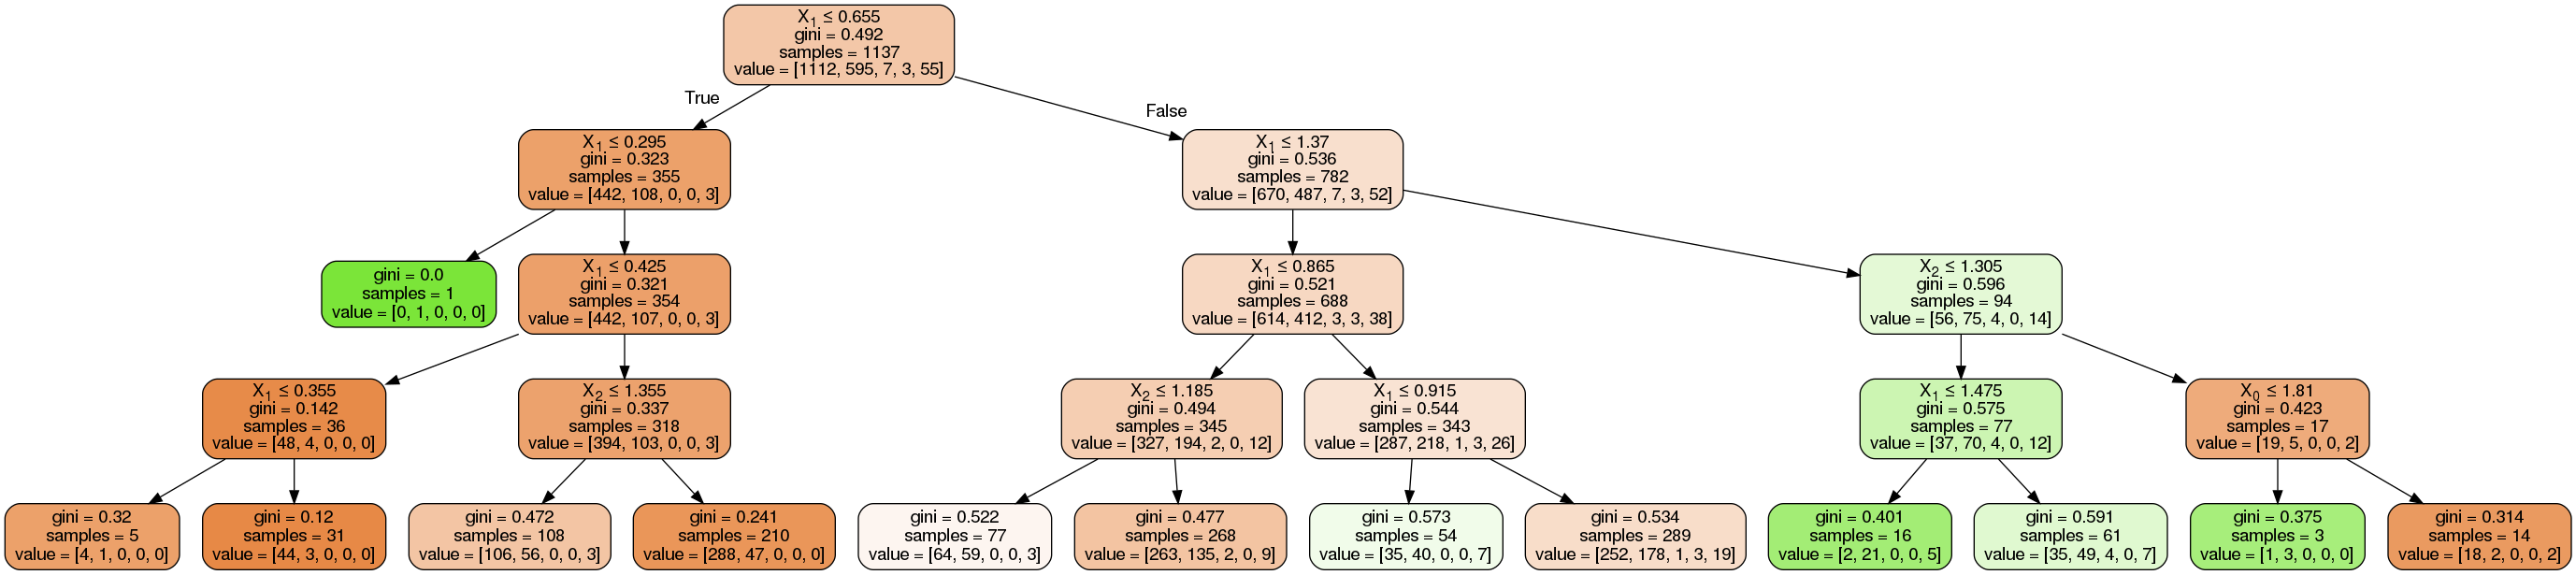

In [63]:
dot_data = tree.export_graphviz(rand.estimators_[5], out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

In [64]:
print (cross_val_score(rand2, X2, y2, cv=10,scoring="accuracy").mean())

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.14146903878696473


In [65]:
@interact(LDL=2.5, TG=1.3, HDL =1.2)
def show(LDL, TG, HDL):
    return rand2.predict([[LDL, TG, HDL]])

interactive(children=(FloatSlider(value=2.5, description='LDL', max=7.5, min=-2.5), FloatSlider(value=1.3, description='TG', max=3.9000000000000004, min=-1.3), FloatSlider(value=1.2, description='HDL', max=3.5999999999999996, min=-1.2), Output()), _dom_classes=('widget-interact',))

## Regresión Estado

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
reg=LogisticRegression()

In [68]:
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
cross_val_score(reg,X,y).mean()

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.6433479483925887

In [70]:
@interact(LDL=2.5, TG=1.3, HDL =1.2)
def show(LDL, TG, HDL):
    return reg.predict([[LDL, TG, HDL]])

interactive(children=(FloatSlider(value=2.5, description='LDL', max=7.5, min=-2.5), FloatSlider(value=1.3, description='TG', max=3.9000000000000004, min=-1.3), FloatSlider(value=1.2, description='HDL', max=3.5999999999999996, min=-1.2), Output()), _dom_classes=('widget-interact',))

## Regresión BMI

In [71]:
reg2=LogisticRegression()

In [72]:
reg2.fit(X2_train,y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
cross_val_score(reg2,X2,y2).mean()

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.13407032670505795

In [74]:
@interact(LDL=2.5, TG=1.3, HDL =1.2)
def show(LDL, TG, HDL):
    return reg2.predict([[LDL, TG, HDL]])

interactive(children=(FloatSlider(value=2.5, description='LDL', max=7.5, min=-2.5), FloatSlider(value=1.3, description='TG', max=3.9000000000000004, min=-1.3), FloatSlider(value=1.2, description='HDL', max=3.5999999999999996, min=-1.2), Output()), _dom_classes=('widget-interact',))

## K nearest neighbors Estado

In [75]:
from sklearn.neighbors import KNeighborsClassifier
kne = KNeighborsClassifier(n_neighbors=6)

In [76]:
kne.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test,kne.predict(X_test))

0.6252821670428894

In [79]:
kne2 = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=6),
                    param_grid={"n_neighbors":np.arange(1,50)},)
kne2.fit(X,y)
kne2.best_params_

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


{'n_neighbors': 48}

In [80]:
kne2.best_score_

0.6347629796839729

In [81]:
accuracy_score(y_test,kne2.predict(X_test))

0.6591422121896162

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
cross_val_score(KNeighborsClassifier(n_neighbors=1),X,y).mean()

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.5354658539371283

In [84]:
@interact(k=10)
def show(k):
    print(cross_val_score(KNeighborsClassifier(n_neighbors=k),X,y).mean())

interactive(children=(IntSlider(value=10, description='k', max=30, min=-10), Output()), _dom_classes=('widget-interact',))

## K nearest neighbors BMI

In [85]:
kneB = KNeighborsClassifier(n_neighbors=6)

In [86]:
kneB.fit(X2_train,y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [87]:
accuracy_score(y2_test,kneB.predict(X2_test))

0.09664948453608248

In [88]:
kneB2 = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=6),
                    param_grid={"n_neighbors":np.arange(1,50)},)
kneB2.fit(X2,y2)
kneB2.best_params_

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


{'n_neighbors': 48}

In [89]:
kneB2.best_score_

0.14988713318284425

In [90]:
accuracy_score(y2_test,kneB2.predict(X2_test))

0.2190721649484536

In [91]:
cross_val_score(KNeighborsClassifier(n_neighbors=1),X2,y2).mean()

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.10297350329883075

In [92]:
@interact(k=10)
def show(k):
    print(cross_val_score(KNeighborsClassifier(n_neighbors=k),X2,y2).mean())

interactive(children=(IntSlider(value=10, description='k', max=30, min=-10), Output()), _dom_classes=('widget-interact',))

## Bagging Estado

In [93]:
from sklearn.ensemble import BaggingClassifier

In [94]:
bclf = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100,oob_score=True)

In [95]:
bclf.fit(X_train,y_train)
bclf.oob_score_

0.6427765237020316

In [96]:
accuracy_score(y_test,bclf.predict(X_test))

0.6568848758465011

In [97]:
@interact(LDL=2.5, TG=1.3, HDL =1.2)
def show(LDL, TG, HDL):
    return bclf.predict([[LDL, TG, HDL]])

interactive(children=(FloatSlider(value=2.5, description='LDL', max=7.5, min=-2.5), FloatSlider(value=1.3, description='TG', max=3.9000000000000004, min=-1.3), FloatSlider(value=1.2, description='HDL', max=3.5999999999999996, min=-1.2), Output()), _dom_classes=('widget-interact',))

## Bagging BMI

In [98]:
bclf2 = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100,oob_score=True)

In [99]:
bclf2.fit(X2_train,y2_train)
bclf2.oob_score_

0.13064628214037527

In [100]:
accuracy_score(y2_test,bclf2.predict(X2_test))

0.125

In [101]:
@interact(LDL=2.5, TG=1.3, HDL =1.2)
def show(LDL, TG, HDL):
    return bclf2.predict([[LDL, TG, HDL]])

interactive(children=(FloatSlider(value=2.5, description='LDL', max=7.5, min=-2.5), FloatSlider(value=1.3, description='TG', max=3.9000000000000004, min=-1.3), FloatSlider(value=1.2, description='HDL', max=3.5999999999999996, min=-1.2), Output()), _dom_classes=('widget-interact',))